In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/data.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [38]:
df.shape

(3650, 2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [40]:
df['Date']=pd.to_datetime(df['Date'])

In [41]:
df=df.set_index(['Date'])

In [42]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df)
print('1.ADF STATISTICS:',dftest[0])
print('2.P-VALUE:',dftest[1])
print('3.No of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5.Critical Values:')
for keys,values in dftest[4].items():
  print(f'{keys}:{values}')
if dftest[1]>=0.05:
  print('Not Stationary')
else:
  print('Stationary')

1.ADF STATISTICS: -4.4448049246117
2.P-VALUE: 0.0002470826300360994
3.No of lags: 20
4.No of observations: 3629
5.Critical Values:
1%:-3.4321532327220154
5%:-2.862336767636517
10%:-2.56719413172842
Stationary


<Axes: xlabel='Date'>

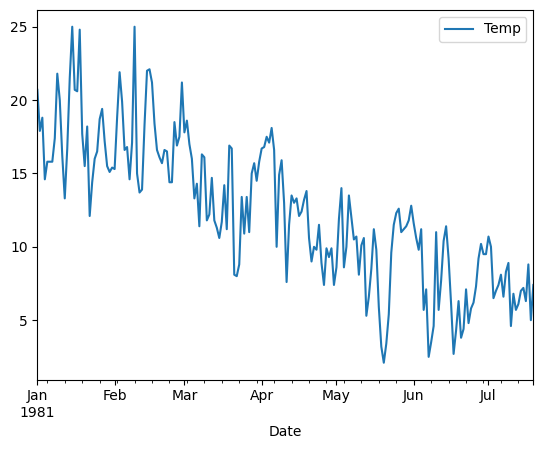

In [43]:
df[:200].plot()

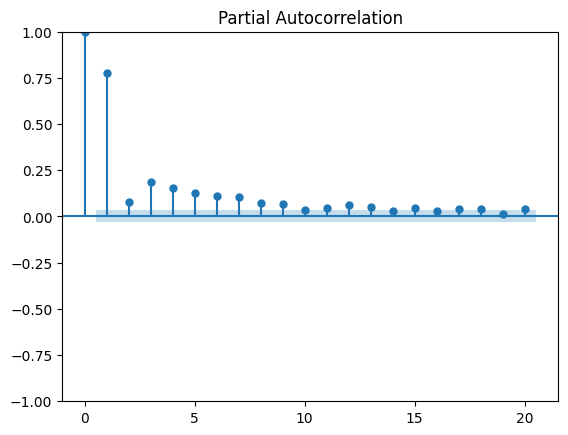

In [44]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf=pacf(df)
plot_pacf=plot_pacf(df,lags=20)

In [45]:
train=df.iloc[:3640]['Temp']
test=df.iloc[3641:]['Temp']

In [46]:
train.shape

(3640,)

In [47]:
model=AutoReg(train,lags=9).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3640
Model:                     AutoReg(9)   Log Likelihood               -8372.989
Method:               Conditional MLE   S.D. of innovations              2.428
Date:                Sun, 31 Dec 2023   AIC                          16767.977
Time:                        12:37:09   BIC                          16836.147
Sample:                             9   HQIC                         16792.261
                                 3640                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9661      0.141      6.862      0.000       0.690       1.242
Temp.L1        0.6131      0.017     37.059      0.000       0.581       0.645
Temp.L2       -0.0822      0.019     -4.235      0.0

In [49]:
print(len(train)),print(len(test))

3640
9


(None, None)

In [50]:
pred=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [51]:
pred

3640    13.006389
3641    13.367885
3642    13.581535
3643    13.706410
3644    13.651831
3645    13.740984
3646    13.534918
3647    13.409902
3648    13.222567
dtype: float64

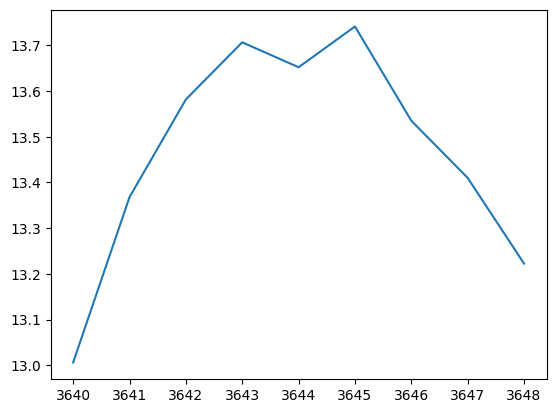

In [52]:
plt.plot(pred)


In [53]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,pred)

In [55]:
rmse=np.sqrt(mse)
rmse

1.4468580568926035

In [56]:
forecast=model.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: >

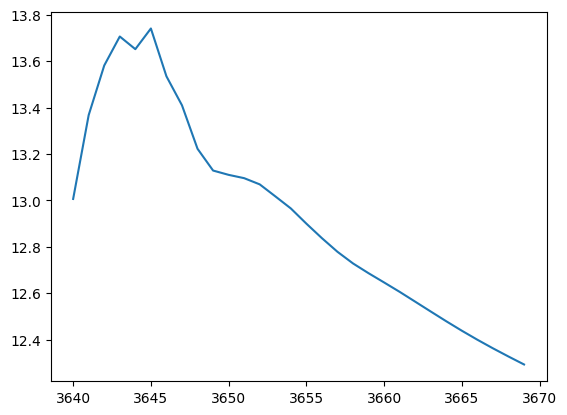

In [57]:
forecast.plot()